<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/mechanics/answers-to-selected-assignments/sample_answer_to_modeling_a_simple_coupled_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up python libraries

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

import sympy as sym
from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting

In [2]:
# Install the simulation helpers
!pip install --quiet "git+https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view.git#egg=rigid-body-sim"
import sims
mr = sims.RigidBodySim()

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Problem: Simple spring mass damper system

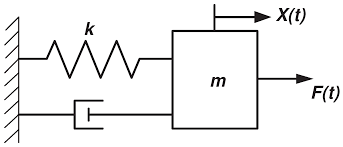

* Show that the small amplitude motion of the above system can be modelled as
\begin{align*}
\ddot{x}+2\zeta \omega_n\dot{x}+\omega_n^2x=\frac{1}{m}F
\end{align*}
where we have set $\omega_n^2=k/m$ and $2\zeta\omega_n=c/m$.

* Show that above system can also be written down as a first order matrix ODE
\begin{align*}
\dot{Y}=AY+BF
\end{align*}
where
\begin{align*}
A=\left[\begin{matrix}0 & 1\\- \omega_{n}^{2} & - 2 \omega_{n} \zeta\end{matrix}\right],
\end{align*}
\begin{align*}
B=\left[\begin{matrix}0 \\\frac{1}{m}\end{matrix}\right]
\end{align*}
and
\begin{align*}
Y=\left[\begin{matrix}x \\ \dot{x}\end{matrix}\right]
\end{align*}

* For given initial conditions ${Y}(0)={y}_0$, show that the general solution of the system can be written down as:
\begin{align*}
{Y}(t) = e^{{A}t}{y}_0+\int_0^te^{A(t-\tau)}BF(\tau)\,d\tau
\end{align*}

* Numerically solve the above ODE and simulate the dynamics of the system.

## Sample answer

Newton's equations for the center of mass for small amplitude motion is  approximately modelled system gives us that
\begin{align*}
m\ddot{x}=-c\dot{x}-kx+F
\end{align*}
which gives the second order linear differential equation:
\begin{align*}
m\ddot{x}+c\dot{x}+kx=F
\end{align*}

The above equations can be reduced to the form

\begin{align*}
\ddot{x}+2\zeta \omega_n\dot{x}+\omega_n^2x=\frac{1}{m}F
\end{align*}
where we have set $\omega_n^2=k/m$ and $2\zeta\omega_n=c/m$.

---

The above system can also be written down as a first order matrix ODE
\begin{align*}
\dot{Y}=AY+BF
\end{align*}
where
\begin{align*}
A=\left[\begin{matrix}0 & 1\\- \omega_{n}^{2} & - 2 \omega_{n} \zeta\end{matrix}\right],
\end{align*}
\begin{align*}
B=\left[\begin{matrix}0 \\\frac{1}{m}\end{matrix}\right]
\end{align*}
and
\begin{align*}
Y=\left[\begin{matrix}x \\ \dot{x}\end{matrix}\right]
\end{align*}

---


Premultiply the first order matrix ODE by $ e^{-A t} $:

\begin{align*}
e^{-A t} \dot{Y}(t) = e^{-A t} A Y(t) + e^{-A t} B F(t)
\end{align*}

Recall that the derivative of a matrix exponential is:

\begin{align*}
\frac{d}{dt}(e^{-A t}) = -A e^{-A t}
\end{align*}


We want to express the left-hand side as the derivative of $ e^{-A t} Y(t) $.  
Compute its derivative:

\begin{align*}
\frac{d}{dt}\big( e^{-A t} Y(t) \big)
&= \dot{(e^{-A t})} Y(t) + e^{-A t} \dot{Y}(t) \\
&= (-A e^{-A t}) Y(t) + e^{-A t} (A Y(t) + B F(t)) \\
&= {(-A e^{-A t} Y(t) + e^{-A t} A Y(t))} + e^{-A t} B F(t) \\
&= e^{-A t} B F(t)
\end{align*}

Hence we have the identity:

\begin{align*}
\frac{d}{dt}\big( e^{-A t} Y(t) \big) = e^{-A t} B F(t)
\end{align*}

Integrate both sides from $ 0$ to $t$

\begin{align*}
\int_0^t \frac{d}{d\tau}\big( e^{-A \tau} Y(\tau) \big)\, d\tau
&= \int_0^t e^{-A \tau} B F(\tau)\, d\tau
\end{align*}

Evaluate the left-hand side directly:

\begin{align*}
e^{-A t} Y(t) - e^{-A \cdot 0} Y(0)
= \int_0^t e^{-A \tau} B F(\tau)\, d\tau
\end{align*}

Simplify using $ e^{0} = I $ and $ Y(0) = y_0 $:

\begin{align*}
e^{-A t} Y(t) - y_0 = \int_0^t e^{-A \tau} B F(\tau)\, d\tau
\end{align*}

Multiply both sides by $ e^{A t} $

\begin{align*}
Y(t)
&= e^{A t} y_0 + e^{A t} \int_0^t e^{-A \tau} B F(\tau)\, d\tau
\end{align*}

Because $ e^{A t} e^{-A \tau} = e^{A (t - \tau)} $ (matrices commute with themselves), we get:

\begin{align*}
\boxed{
Y(t) = e^{A t} y_0 + \int_0^t e^{A (t - \tau)} B F(\tau)\, d\tau
}
\end{align*}

This is the matrix (state-space) version of the **method of variation of parameters** — sometimes called the method of variation of constants in differential equations texts.

Note that

\begin{align*}
e^{\mathbf{A}t} = \sum_{n=0}^{\infty} \frac{(\mathbf{A}t)^n}{n!}
\end{align*}

---

#### Interpretation

- The first term $ e^{A t} y_0 $ is the **homogeneous (free)** solution.  
- The second term $ \int_0^t e^{A (t - \tau)} B F(\tau)\, d\tau $ is the **forced** (particular) solution.  
- The operator $ e^{A (t - \tau)} $ acts as the **state transition matrix**, propagating the effect of input $ F(\tau) $ from past time $ \tau $ to the present time $ t $.


### Simulation

In [ ]:
m=1; k=10; c=float(m*2*0.1*sqrt(k/m));
A=np.array([[0,1],[-k/m,-c/m]]);
[t,sol,fig]=mr.simulate_dy_system(mr.LinearSystemModel, 10,0.01, [1,0], A, 'Spring Mass Damper System', 'Time / t', 'x')

# Problem: Dynamic Modeling of a 3-DOF Mass–Spring–Damper System

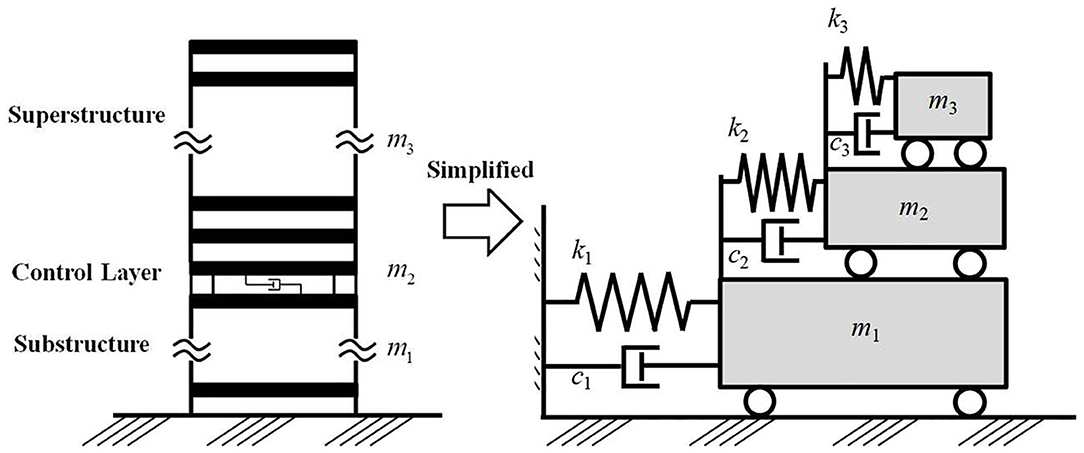



Consider the linear mechanical system shown below:

**System Description:**

Three lumped masses $m_1$, $m_2$, and $m_3$ are connected in series by linear springs and viscous dampers, as illustrated:

Base —– $(k_1,c_1)$ —– $m_1$ —– $(k_2,c_2)$ —– $m_2$ —– $(k_3,c_3)$ —– $m_3$

Each mass can move horizontally with small displacements $x_1$, $x_2$, and $x_3$ from equilibrium.  
All motions are assumed to be small, so the system can be modeled by linear differential equations.

---

## Tasks

### (a) Equations of Motion

Using **Newton’s Second Law**, derive the equations of motion for each mass in terms of the displacements $x_1$, $x_2$, and $x_3$.  
Show that they can be written in matrix form as

\begin{align*}
\mathbf{M}\ddot{\mathbf{x}} + \mathbf{C}\dot{\mathbf{x}} + \mathbf{K}\mathbf{x} = \mathbf{0}
\end{align*}

where $\mathbf{x} = [\,x_1\;x_2\;x_3\,]^T$, and clearly define the matrices  
$\mathbf{M}$, $\mathbf{C}$, and $\mathbf{K}$.

---

### (b) State-Space Representation

Introduce the **state vector**

\begin{align*}
\mathbf{y} =
\begin{bmatrix}
\mathbf{x} \\mathbf{x}}
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \
\dot{x}_1 \\ \dot{x}_2 \\ \dot{x}_3
\end{bmatrix}
\end{align*}

and show that the system can be expressed in **first-order state-space form**:

\begin{align*}
\dot{\mathbf{y}} = \mathbf{A}\mathbf{y}
\end{align*}

where the system matrix $\mathbf{A}$ is

\begin{align*}
\mathbf{A} =
\begin{bmatrix}
\mathbf{0}_{3\times3} & \mathbf{I}_{3\times3} \
-\mathbf{M}^{-1}\mathbf{K} & -\mathbf{M}^{-1}\mathbf{C}
\end{bmatrix}
\end{align*}

---

### (c) Initial-Value Problem (IVP) Solution

For given initial conditions $\mathbf{y}(0)=\mathbf{y}_0$,  
write the **general solution** of the system as

\begin{align*}
\mathbf{y}(t) = e^{\mathbf{A}t}\mathbf{y}_0
\end{align*}

and express the matrix exponential as the infinite series

\begin{align*}
e^{\mathbf{A}t} = \sum_{n=0}^{\infty} \frac{(\mathbf{A}t)^n}{n!}
\end{align*}

---

### (d) Discussion (Optional)

1. Explain the physical meaning of each term in $\mathbf{M}$, $\mathbf{C}$, and $\mathbf{K}$.  
2. Describe what simplifications occur if damping is neglected $(\mathbf{C}=\mathbf{0})$.  
3. Discuss the relationship between the eigenvalues of $\mathbf{A}$ and the natural frequencies and damping ratios of the system.

---

### (e) (Optional Computational Task)

Using Python, NumPy, or Wolfram Language, numerically compute and plot the free vibration response  
for given parameter values:

\begin{align*}
m_1 = m_2 = m_3 = 1\,\text{kg}, \quad
k_1 = k_2 = k_3 = 1000\,\text{N/m}, \quad
c_1 = c_2 = c_3 = 5\,\text{N·s/m}
\end{align*}

with initial conditions

\begin{align*}
x_1(0)=0.01\,\text{m}, \quad x_2(0)=x_3(0)=0, \quad
\dot{x}_1(0)=\dot{x}_2(0)=\dot{x}_3(0)=0
\end{align*}

and verify that the numerical solution satisfies $\dot{\mathbf{y}}=\mathbf{A}\mathbf{y}$.


## Sample answer

We consider a chain of three lumped masses $m_1$, $m_2$, $m_3$ connected by linear springs and viscous dampers.  
The arrangement is:

Base -- $k_1,c_1$ -- $m_1$ -- $k_2,c_2$ -- $m_2$ -- $k_3,c_3$ -- $m_3$

Let each mass move horizontally with small displacements $x_1$, $x_2$, $x_3$ from equilibrium.  
Positive displacement is to the right.

---

## Newton's equations for Each Mass

### Mass 1
Spring $k_1$ and damper $c_1$ connect $m_1$ to the fixed base;  
spring $k_2$ and damper $c_2$ connect $m_1$ to $m_2$.

\begin{align*}
m_1 \ddot{x}_1
&= -k_1 x_1 - c_1 \dot{x}_1
   + k_2 (x_2 - x_1) + c_2 (\dot{x}_2 - \dot{x}_1) \\
\Rightarrow \quad
m_1 \ddot{x}_1
&+ (c_1 + c_2)\dot{x}_1 - c_2 \dot{x}_2
+ (k_1 + k_2)x_1 - k_2 x_2 = 0
\end{align*}

---

### Mass 2
Connected to $m_1$ via $(k_2,c_2)$ and to $m_3$ via $(k_3,c_3)$.

\begin{align*}
m_2 \ddot{x}_2
&= -k_2 (x_2 - x_1) - c_2 (\dot{x}_2 - \dot{x}_1)
   + k_3 (x_3 - x_2) + c_3 (\dot{x}_3 - \dot{x}_2) \\
\Rightarrow \quad
m_2 \ddot{x}_2
&- c_2 \dot{x}_1 + (c_2 + c_3)\dot{x}_2 - c_3 \dot{x}_3
- k_2 x_1 + (k_2 + k_3)x_2 - k_3 x_3 = 0
\end{align*}

---

### Mass 3
Connected only to $m_2$ through $(k_3,c_3)$.

\begin{align*}
m_3 \ddot{x}_3
&= -k_3 (x_3 - x_2) - c_3 (\dot{x}_3 - \dot{x}_2) \\
\Rightarrow \quad
m_3 \ddot{x}_3
&- c_3 \dot{x}_2 + c_3 \dot{x}_3
- k_3 x_2 + k_3 x_3 = 0
\end{align*}

---

## Matrix Form

Collecting the three equations:

\begin{align*}
\begin{bmatrix}
m_1 & 0   & 0 \\
0   & m_2 & 0 \\
0   & 0   & m_3
\end{bmatrix}
\begin{bmatrix}
\ddot{x}_1 \ \ddot{x}_2 \ \ddot{x}_3
\end{bmatrix}
+
\begin{bmatrix}
c_1+c_2 & -c_2      & 0 \\
-c_2     & c_2+c_3   & -c_3 \\
0        & -c_3      & c_3
\end{bmatrix}
\begin{bmatrix}
\dot{x}_1 \ \dot{x}_2 \ \dot{x}_3
\end{bmatrix}
+
\begin{bmatrix}
k_1+k_2 & -k_2      & 0 \\
-k_2     & k_2+k_3   & -k_3 \\
0        & -k_3      & k_3
\end{bmatrix}
\begin{bmatrix}
x_1 \ x_2 \ x_3
\end{bmatrix}
=
\begin{bmatrix}
0 \ 0 \ 0
\end{bmatrix}
\end{align*}

This can be written compactly as:

\begin{align*}
\mathbf{M}\ddot{\mathbf{x}} + \mathbf{C}\dot{\mathbf{x}} + \mathbf{K}\mathbf{x} = \mathbf{0}
\end{align*}

where
$\mathbf{M}$, $\mathbf{C}$, $\mathbf{K}$
are the mass, damping, and stiffness matrices respectively,  
and $\mathbf{x} = [\,x_1\;x_2\;x_3\,]^T$.

---

# State-Space (First-Order) Form of the 3-DOF System

Starting from the matrix equation

\begin{align*}
\mathbf{M}\ddot{\mathbf{x}} + \mathbf{C}\dot{\mathbf{x}} + \mathbf{K}\mathbf{x} = \mathbf{0}
\end{align*}

define the state vector

\begin{align*}
\mathbf{y} =
\begin{bmatrix}
\mathbf{x} \ \dot{\mathbf{x}}
\end{bmatrix}
=
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \
\dot{x}_1 \\ \dot{x}_2 \\ \dot{x}_3
\end{bmatrix}
\end{align*}

---

## Dynamic System in First-Order Form

Differentiating $\mathbf{y}$ gives

\begin{align*}
\dot{\mathbf{y}} =
\begin{bmatrix}
\dot{\mathbf{x}} \ \ddot{\mathbf{x}}
\end{bmatrix}
=
\begin{bmatrix}
\dot{\mathbf{x}} \
-\mathbf{M}^{-1}(\mathbf{C}\dot{\mathbf{x}} + \mathbf{K}\mathbf{x})
\end{bmatrix}
\end{align*}

so that the system can be written compactly as

\begin{align*}
\dot{\mathbf{y}} = \mathbf{A}\mathbf{y}
\end{align*}

where the **system matrix** $\mathbf{A}$ is

\begin{align*}
\mathbf{A} =
\begin{bmatrix}
\mathbf{0}_{3\times3} & \mathbf{I}_{3\times3} \
-\mathbf{M}^{-1}\mathbf{K} & -\mathbf{M}^{-1}\mathbf{C}
\end{bmatrix}
\end{align*}

Here:

* $\mathbf{0}_{3\times3}$ is a $3\times3$ zero matrix,  
* $\mathbf{I}_{3\times3}$ is the $3\times3$ identity matrix,  
* $\mathbf{M}$, $\mathbf{C}$, and $\mathbf{K}$ are the mass, damping, and stiffness matrices defined previously.

---

## Initial-Value Problem (IVP) Solution

The general solution of the linear time-invariant (LTI) system

\begin{align*}
\dot{\mathbf{y}} = \mathbf{A}\mathbf{y}, \qquad \mathbf{y}(0)=\mathbf{y}_0
\end{align*}

is given by the **matrix exponential**:

\begin{align*}
\mathbf{y}(t) = e^{\mathbf{A}t}\mathbf{y}_0
\end{align*}

where

\begin{align*}
e^{\mathbf{A}t} = \sum_{n=0}^{\infty} \frac{(\mathbf{A}t)^n}{n!}
\end{align*}

---

## Notes

- The upper half of $\mathbf{y}(t)$ gives displacements $\mathbf{x}(t)$;  
  the lower half gives velocities $\dot{\mathbf{x}}(t)$.
- For **free undamped vibration**, set $\mathbf{C}=\mathbf{0}$;  
  the system then simplifies to
  \begin{align*}
  \mathbf{A} =
  \begin{bmatrix}
  \mathbf{0} & \mathbf{I} \\
  -\mathbf{M}^{-1}\mathbf{K} & \mathbf{0}
  \end{bmatrix}
  \end{align*}
  and solutions are combinations of oscillatory modes determined by the eigenvalues of $\mathbf{A}$.

---

That’s your complete state-space formulation and closed-form solution for  
\begin{align*}
\dot{\mathbf{y}} = \mathbf{A}\mathbf{y}, \qquad \mathbf{y}(0)=\mathbf{y}_0.
\end{align*}

## Simulation

In [ ]:
# ------------------------------------------------
# 1️⃣ Define system parameters
# ------------------------------------------------
m1, m2, m3 = 1.0, 1.0, 1.0   # masses [kg]
k1, k2, k3, k4 = 1000, 1000, 1000, 1000   # spring constants [N/m]
c1, c2, c3, c4 = 2.0, 2.0, 2.0, 2.0       # damping coefficients [N·s/m]

# ------------------------------------------------
# 2️⃣ Build M, C, K matrices
# ------------------------------------------------
M = np.diag([m1, m2, m3])

K = np.array([
    [k1 + k2, -k2,        0],
    [-k2,     k2 + k3,   -k3],
    [0,       -k3,        k3 + k4]
])

C = np.array([
    [c1 + c2, -c2,        0],
    [-c2,     c2 + c3,   -c3],
    [0,       -c3,        c3 + c4]
])

# ------------------------------------------------
# 3️⃣ Build state-space system:  y = [x; x_dot]
#     dot{y} = A y
# ------------------------------------------------
Z = np.zeros((3,3))
I = np.eye(3)
A_top = np.hstack((Z, I))
A_bottom = np.hstack((-np.linalg.inv(M) @ K, -np.linalg.inv(M) @ C))
A = np.vstack((A_top, A_bottom))

print("System matrix A:")
print(A)

# ------------------------------------------------
# 4️⃣ Initial conditions
# ------------------------------------------------
x0 = np.array([0.1, 0.0, 0.0])     # initial displacements [m]
xdot0 = np.zeros(3)                # initial velocities
y0 = np.hstack((x0, xdot0))        # initial state vector

# ------------------------------------------------
# 5️⃣ Simulate the linear system using your class
# ------------------------------------------------
t_max = 10.0   # seconds
dt = 0.01

t, sol, fig = mr.simulate_dy_system(
    mr.LinearSystemModel,   # model function
    t_max,
    dt,
    y0,
    A,                       # system matrix
    fig_title="3DOF Structural System Response",
    x_label="Time [s]",
    y_label="State variables [x1, x2, x3, x1_dot, x2_dot, x3_dot]"
)

# ------------------------------------------------
# 6️⃣ Plot only displacements (x1, x2, x3)
# ------------------------------------------------
fig_disp = go.Figure()
fig_disp.add_trace(go.Scatter(x=t, y=sol[:,0], mode='lines', name='x₁(t)'))
fig_disp.add_trace(go.Scatter(x=t, y=sol[:,1], mode='lines', name='x₂(t)'))
fig_disp.add_trace(go.Scatter(x=t, y=sol[:,2], mode='lines', name='x₃(t)'))

fig_disp.update_layout(
    title="Displacement Response of 3DOF System",
    xaxis_title="Time [s]",
    yaxis_title="Displacement [m]"
)

fig_disp.show()